# Customer Churn Prediction with Logistic Regression

### Introduction
This project is a case study on predicting customer churn in the telecommunications industry using Logistic Regression.  
The goal is to evaluate how well we can identify customers at risk of leaving and to explore which factors most influence churn.  

### Business Scenario
Telecom companies face high costs when customers switch to competitors. Retaining existing customers is generally more cost-effective than acquiring new ones. Accurately predicting churn allows companies to proactively intervene, improve retention, and reduce revenue loss.  

### Dataset
The dataset used here (Telco Churn) contains customer demographic and service usage information.  
Each record represents an individual customer, including details such as tenure, income, equipment ownership, and churn status (whether the customer left).  

We will build a baseline model, evaluate it using **log loss** (a probability-based error metric), and refine it through feature experiments and pipeline improvements to achieve more reliable churn predictions.  


# Preprocessing

In [1]:
!pip install -U "numpy==1.26.4" "pandas==2.2.3" "scikit-learn==1.4.2" "matplotlib==3.8.4" "scipy==1.11.4"

In [2]:
import pandas as pd
import numpy as np

# Scikit-learn modules for ML pipeline
from sklearn.model_selection import train_test_split # split dataset into train/test
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.preprocessing import StandardScaler  # feature scaling

# Evaluation metrics
from sklearn.metrics import log_loss  # measure model performance
import matplotlib.pyplot as plt

%matplotlib inline 

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


### Feature Selection

In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


In [5]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [6]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [7]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Splitting the dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

## Logistic Regression Classifier modeling

In [9]:
LR = LogisticRegression().fit(X_train,y_train)

In [10]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [11]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

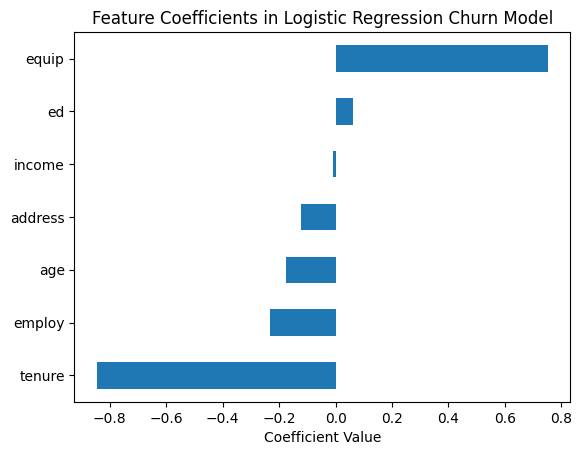

In [12]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

### Conclusion 
Tenure is the strongest protective factor: loyal, long-term customers are most unlikely to churn;
Having more equipment is the strongest risk factor: customers with multiple services or devices are more likely to leave. Other features (education, age, income, etc.) have weaker effects, but slightly lean toward increasing churn.

## Performance Evaluation

In [13]:
log_loss(y_test, yhat_prob)

0.6257718410257235

### Conclusion 
The Logistic Regression model achieved a log loss of 0.63, indicating reasonable probability calibration. While not perfect, the model captures meaningful churn patterns and provides a strong baseline for further improvement with advanced models.

# Model refinement at the feature and pipeline level

To move beyond a simple baseline, I introduced several refinements that improved the model’s performance and reliability:

Stratified Train/Test Split
Ensured the proportion of churners and non-churners remained consistent in both training and test sets. This provides a fairer evaluation and makes results more representative of real-world customer data.

Training-Only Scaling
Standardized features using only the training set before applying the transformation to the test set. This avoids data leakage and better simulates how the model would behave on unseen customers.

Stable Model Convergence
Increased the maximum iterations for Logistic Regression to guarantee the model converges. This leads to stable coefficients and more trustworthy probability estimates.

Feature Exploration
Tested the impact of adding and removing features (e.g., callcard, wireless, equip) on the log loss score. These experiments highlighted which features added predictive value and which introduced unnecessary noise.

In [29]:
def eval_logloss_orig(features, *, test_size=0.2, seed=4, return_model=False):

    X = churn_df[features].values
    y = churn_df['churn'].astype(int).values

    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=test_size, random_state=seed, stratify=y
    )   # makes sure the churn ratio is the same in train and test.

    scaler = StandardScaler().fit(X_tr)
    X_tr_s = scaler.transform(X_tr)
    X_te_s  = scaler.transform(X_te)

    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_tr_s, y_tr)

    y_prob = lr.predict_proba(X_te_s)[:, 1]
    ll = log_loss(y_te, y_prob)
    if return_model:
        return ll, lr, features
    return ll

def plot_coefficients(model, features, title="Feature Coefficients"):
    coef = pd.Series(model.coef_[0], index=features).sort_values()
    ax = coef.plot(kind='barh')
    ax.set_title(title)
    ax.set_xlabel("Coefficient Value")
    plt.show()


In [30]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [39]:
base_feats = ['tenure','age','address','income','ed','employ','equip']

exp_sets = {
    "Baseline"             : base_feats,
    "+callcard"            : base_feats + ['callcard'],
    "+wireless"            : base_feats + ['wireless'],
    "+callcard + wireless" : base_feats + ['callcard','wireless'],
    "-equip"               : [f for f in base_feats if f!='equip'],
    "-income, -employ"     : [f for f in base_feats if f not in ('income','employ')]
}

# Run evaluation and collect log losses
results = {}
for name, feats in exp_sets.items():
    ll, _, _ = eval_logloss_orig(feats, return_model=True)  
    results[name] = ll
    
# Put into a DataFrame for clarity
res_df = pd.DataFrame.from_dict(results, orient='index', columns=['Log Loss'])
baseline_val = results["Baseline"]
res_df["vs Baseline"] = res_df["Log Loss"] - baseline_val

# Sort to make it easy to read
#res_df = res_df.sort_values("Log Loss")
print(res_df)

                      Log Loss  vs Baseline
Baseline              0.542969     0.000000
+callcard             0.539180    -0.003790
+wireless             0.543040     0.000071
+callcard + wireless  0.538945    -0.004024
-equip                0.547941     0.004972
-income, -employ      0.550169     0.007200


### Conclusion 
- After fine-tuning, the model using callcard + wireless achieved the best performance (log loss = 0.5389). 
- The feature `callcard` slightly improves predictions, while `wireless` adds little value.  
- Removing `equip`, `income`, or `employ` hurts performance, showing they provide useful signals.  

Overall, the fine-tuned model achieved **lower log loss (~0.54)** compared to the baseline, 
demonstrating more reliable churn probability predictions. 

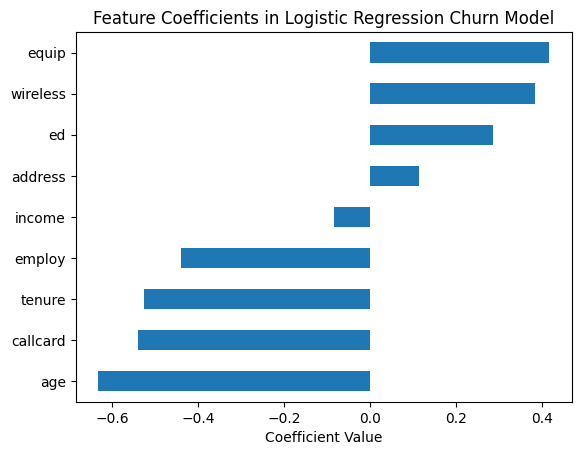

In [41]:
# Visualize coefficients of the best model (c: callcard + wireless)
plot_coefficients(model_c, feats_c, 
                  title="Feature Coefficients in Logistic Regression Churn Model")

### Conclusion 
This analysis highlights which customer characteristics most strongly drive churn:

High churn risk: customers with more equipment and wireless services.
Low churn risk: older, long-tenured customers who use call cards.

From a business perspective, the model suggests focusing retention strategies on younger, wireless-heavy customers with multiple devices, while maintaining loyalty programs for older and long-tenured clients.